# CH 3. 분류
   ##  ☐ MNIST
   ### 𝐎 MNIST 이미지 분류기 
   - 28X28 픽셀 단위로 각 픽셀당 0~255 사이에 값이 저장 되어있고 수 많은 미국 고등학생 등의 사람들이 적은 숫자들 사진을 7000개를 보유하고 있음
   - 이 사진들을 이용하여 분류기를 훈련시키고 임의의 숫자 손글씨 사진을 넣어서 숫자를 (T,F => 이진분류기)맞추거나 주변이 더러운 숫자를 주변이 깨끗한 숫자로 만드는 등 분류 기초단계 연습에 좋은 data
   - 이진 분류시 교재에선 SGD(확률적 기울기 하강)을 선택했고 대량의 데이터일 경우 효과적이라고 소개, SGD : 한 번에 한 개씩 독립적으로 훈련을 하므로 온라인학습에 알맞음, 데이터가 overfitting 되는 것을 방지하기 위해 교차검증(cross-validation)을 사용하였고 fold값을 3으로 했고 평균이 95%이상인 분류기를 완성 가능.

In [4]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

### 한글 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')

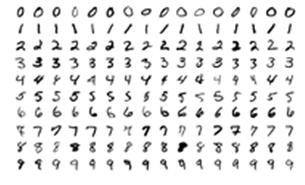

In [5]:
from IPython.display import Image
Image(filename = 'Ch3 MNIST.jpg', width = 400, height = 400)

###  𝐎 분류기 성능 평가
####      - 오차 행렬

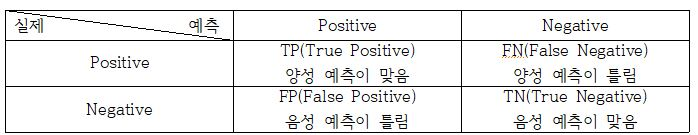

In [6]:
Image(filename = 'Ch3. ConfusionMatrix.JPG', width = 600, height = 600)

$$ㆍ정확도(Accuracy)  =  \frac{ TP + TN }{ TP + TN + FP + FN }$$ 

$$ㆍ정밀도(Precision) =  \frac{ TP }{ TP + FP} $$

$$ㆍ재현율(Recall) = \frac{ TP }{ TP + FN} $$

### ※ precision과 recall의 관계

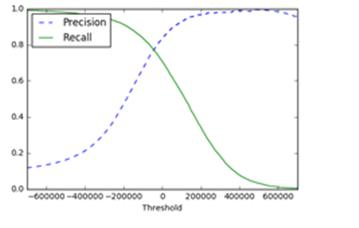

In [7]:
Image(filename = 'Ch3 Precision_Recall Curve.jpg', width = 500, height = 500)

### ※ 정밀도와 재현율은 한 가지 답으로 올인하면 100%가 나오기 떄문에 이를 통한 혼란을 방지하고자  

$$ ㆍF1 Score = \frac{2 \times Recall \times Precision}{Racall + Precision} $$

#### => 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 갖음
#### == 불균형한 데이터셋을 다룰 때 성능 측정 지표가 되지 않는다.

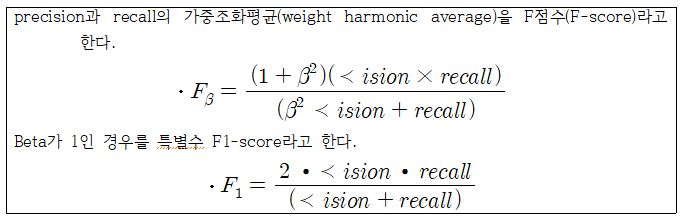

In [8]:
Image(filename = 'Ch3 F1 Score.jpg', width = 500, height = 500)

### 결정임계값과 정밀도/재현율 트레이드 오프

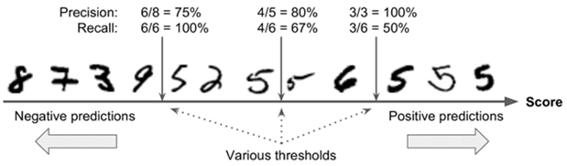

In [9]:
Image(filename = 'Ch3 정밀도_재현율 트레이드 오프.jpg', width = 500, height = 500)

## ROC Curve 
- 거짓 양성 비율(False Positive Rate)에 대한 진짜 양성 비율(True Positive Rate, 민감도, 재현율)의 곡선

- FPR : 양성으로 잘못 분류된 음성 샘플의 비율 = 1 – 음성으로 정확하게 분류한 음성 샘플의 비율
- TNR : 특이도, 
- ROC Curve : 민감도(재현율)에 대한 1 – 특이도 그래프

$$ ㆍFPR = \frac{FP}{FP + TN} = \frac{FP + TN - TN}{FP + TN} = 1 - \frac{TN}{FP + TN} = 1 - TNR $$

- AUC(Area Under the Curve, 곡선 아래의 면적)을 측정하면 분류기들을 비교


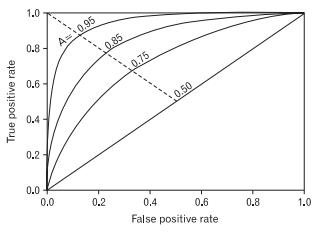

In [10]:
Image(filename = 'Ch3 ROC Curve.jpg', width = 500, height = 500)

- y = x 선과 평행하면서 ROC Curve와 접하는 부분이 y = x와 가장 멀리 있는 점이므로  그 점을 임계값으로 설정한다. ( 기울기가 1이면서 ROC Curve와 접하는 점 == 임계값) 

# Code

In [93]:
import numpy as np
import pandas as pd

In [58]:
import warnings
warnings.filterwarnings( action = 'ignore' )

## Mnist Data 불러오기

In [59]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [60]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

## Mnist Data 중 일부 28 x 28 행렬로 변환 후 이미지 출력

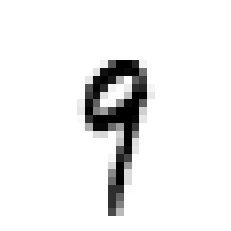

In [61]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[600]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")
plt.axis("off")
plt.show()

### 위 이미지에 대한 target 값

In [62]:
y[600]

'9'

## train_test_split 대신 직접 갯수 분류

In [63]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [64]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### train set, test set이 원래는 0 ~ 9까지의 문자값이지만 
### 해당 함수로 False or True로 이진 분류로 만듦

In [65]:
y_train_9 = (y_train == '9')
y_test_9 = (y_test == '9')

# Modeling

In [66]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 10, random_state = 42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [67]:
sgd_clf.predict([some_digit])

array([ True])

## 교차 검증

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_9) :
    
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.94715
0.94705
0.948


In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

array([0.94715, 0.94705, 0.948  ])

In [74]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y = None) :
        pass
    def predict(self, X) :
        return np.zeros( (len(X), 1), dtype = bool )

In [75]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

array([0.9007 , 0.9005 , 0.90135])

## Confusion Matrix

In [77]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3)

In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_train_pred)

array([[52455,  1596],
       [ 1560,  4389]], dtype=int64)

# 정확히 일치

In [80]:
y_train_perfect_predictions = y_train_9

In [81]:
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]], dtype=int64)

# Data가 불균형일 때 많은 부분으로 다 찍은 경우

In [95]:
y_train_unbalance = np.array([False] * len(y_train_9))
y_train_unbalance

array([False, False, False, ..., False, False, False])

In [94]:
pd.Series(y_train_9).unique()

array([False,  True])

In [96]:
y_unbal_accuracy = sum(y_train_9 == y_train_unbalance) / len(y_train_9)
y_unbal_accuracy

0.90085

# 이를 보완하기 위해 Accuracy가 아닌 다른 것들

## 정밀도와 재현율

In [104]:
from sklearn.metrics import precision_score, recall_score
print("Precision : ", precision_score(y_train_9, y_train_pred), 
    "\nRecall : ", recall_score(y_train_9, y_train_pred))

Precision :  0.7333333333333333 
Recall :  0.7377710539586485


## Precision과 Recall 또한 하나만 보면 안되기에
## F1 Score 활용

In [103]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.7355455002513827

# 상황에 따라 Precision 높고 Recall 낮은
# 혹은 반대의 상황 또는 F1 Scroe를 보는 등 
# 해당 분야의 맞는 Score를 보아야함.

## Precision / Recall Trade Off

### decision function과 결정 임계값을 중점으로

## some_digit가 9일 decision function

In [105]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([67842.7661648])

### 결정 임계값보다 decision function으로 나온 decision score과 비교하여
### True False 결정

In [107]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])